In [8]:
import numpy as np
import pingouin as pg
import glob
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Initialization
list_labels_ref = [0.2,0.4,0.6]
#conditions = ['normal', 'cube', 'floor', 'sphere', 'floorsphere', 'whole']
list_intensities = list(np.round(np.array([0, 0.35, 0.75, 1.5, 3]), 2))
conditions = ['normal', 'cube', 'sphere', 'floor', 'floorsphere', 'whole']
channels = ['R', 'G', 'B']
datasets = ['eevee', '128']

gvalue = np.arange(0.2,0.81,(0.8-0.2)/(len(conditions)-1))
colors_ref = [tuple([i, i, i]) for i in gvalue]

list_observers = glob.glob('/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/*')

shape_array_xp = tuple([len(conditions), len(list_labels_ref), len(list_intensities), len(channels)])

dict_observers = {}
array_responses_eevee = np.zeros(tuple([len(list_observers)]) + shape_array_xp )
array_responses_cycles = np.zeros(tuple([len(list_observers)]) + shape_array_xp )
array_refs = np.zeros(shape_array_xp )

dict_responsespercond_eevee = {} # shape following that of the analysis for the models
dict_responsespercond_cycles = {} # shape following that of the analysis for the models
for condition in conditions:
    dict_responsespercond_eevee[condition] = np.zeros(tuple([len(list_observers)]) + shape_array_xp[1:])
    dict_responsespercond_cycles[condition] = np.zeros(tuple([len(list_observers)]) + shape_array_xp[1:])
    
for r, ref in enumerate(list_labels_ref): 
    array_refs[:,r] = ref


In [10]:
print(list_observers)

#### Organizing the data in a data frame.
GENDER = ['F', 'M', 'F', 'M', 'F', 'M', 'F']
DATA = {}
DATA['ID'] =list(); DATA['ref'] = list(); DATA['illu'] = list(); DATA['match'] = list(); DATA['resp_time'] = list(); 
DATA['channel'] = list(); DATA['dataset'] = list(); DATA['condition'] = list(); DATA['gender'] = list(); DATA['error'] = list()
RESP = []
for o, observerp in enumerate(list_observers):
    obs_initials = observerp.split('/')[-1][:3]
    dict_observers[obs_initials] = {}
    for dat in datasets:
        dict_observers[obs_initials][dat] = np.zeros(shape_array_xp)
    with open(observerp, 'r') as file:
        csvreader = csv.reader(file)
        for row in csvreader:
            DATA['ID'].append(obs_initials)
            ref = float(row[0].split('_')[1])
            match = float(row[1].split('_')[2])
            illu = float(row[0].split('_')[3])
            channel = row[0].split('_')[-1][0]
            dataset = row[-1]
            
            if len(row[0].split('_'))==5:
                condition = 'normal'
            else:
                condition = row[0].split('_')[4]
            if float(row[-2]) < 0.5:
                answ = np.nan
                DATA['resp_time'].append(np.nan)
            else:
                answ = match
                DATA['resp_time'].append(float(row[-2]))
            DATA['match'].append(answ)
            DATA['condition'].append(condition)
            DATA['ref'].append(ref)
            DATA['illu'].append(illu)
            DATA['dataset'].append(dataset)
            DATA['gender'].append(GENDER[o])
            DATA['error'].append(answ - float(row[0].split('_')[1]))
            DATA['channel'].append(channel)
            dict_observers[obs_initials][dataset][conditions.index(condition), list_labels_ref.index(ref), list_intensities.index(illu), channels.index(channel)] = answ
    array_responses_eevee[o] = dict_observers[obs_initials]['eevee']
    array_responses_cycles[o] = dict_observers[obs_initials]['128']

#### We distinguish between eevee and cycles
for o, observerp in enumerate(list_observers):
    for c, condition in enumerate(conditions):
        dict_responsespercond_eevee[condition][o,:] = array_responses_eevee[o,c]
        dict_responsespercond_cycles[condition][o,:] = array_responses_cycles[o,c]

df = pd.DataFrame.from_dict(DATA)
df_eevee = df[df['dataset']=='eevee']


['/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/lek2024-11-12_17h55.15.832.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/txh2024-09-05_11h17.20.727.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/rlt2024-09-06_13h24.38.262.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/krd2024-09-05_15h34.26.583.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/yxd2024-09-09_15h10.24.349.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/jmm2024-09-06_11h11.22.387.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/yxc2024-09-12_13h

In [11]:
df_eevee

,ID,ref,illu,match,resp_time,channel,dataset,condition,gender,error
0,lek,0.4,0.00,0.475,3.249864,G,eevee,normal,F,0.075
2,lek,0.4,3.00,0.100,3.634400,R,eevee,sphere,F,-0.300
3,lek,0.6,0.00,0.725,2.717328,B,eevee,normal,F,0.125
4,lek,0.4,3.00,0.100,1.567158,B,eevee,whole,F,-0.300
5,lek,0.4,1.50,0.300,2.275639,R,eevee,normal,F,-0.100
...,...,...,...,...,...,...,...,...,...,...
2515,yxc,0.4,0.35,0.350,5.593349,B,eevee,floor,F,-0.050
2516,yxc,0.2,0.75,0.150,3.842758,R,eevee,sphere,F,-0.050
2517,yxc,0.4,1.50,0.225,2.200369,G,eevee,normal,F,-0.175
2518,yxc,0.6,3.00,0.150,9.186406,R,eevee,whole,F,-0.450


/home/alban/DeepLearning/lib/python3.11/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


    Source        SS  DF        MS          F         p-unc       ng2  \
0  channel  0.003119   2  0.001559  69.769593  2.465686e-07  0.490999   
1    Error  0.000268  12  0.000022        NaN           NaN       NaN   

        eps  
0  0.879727  
1       NaN  


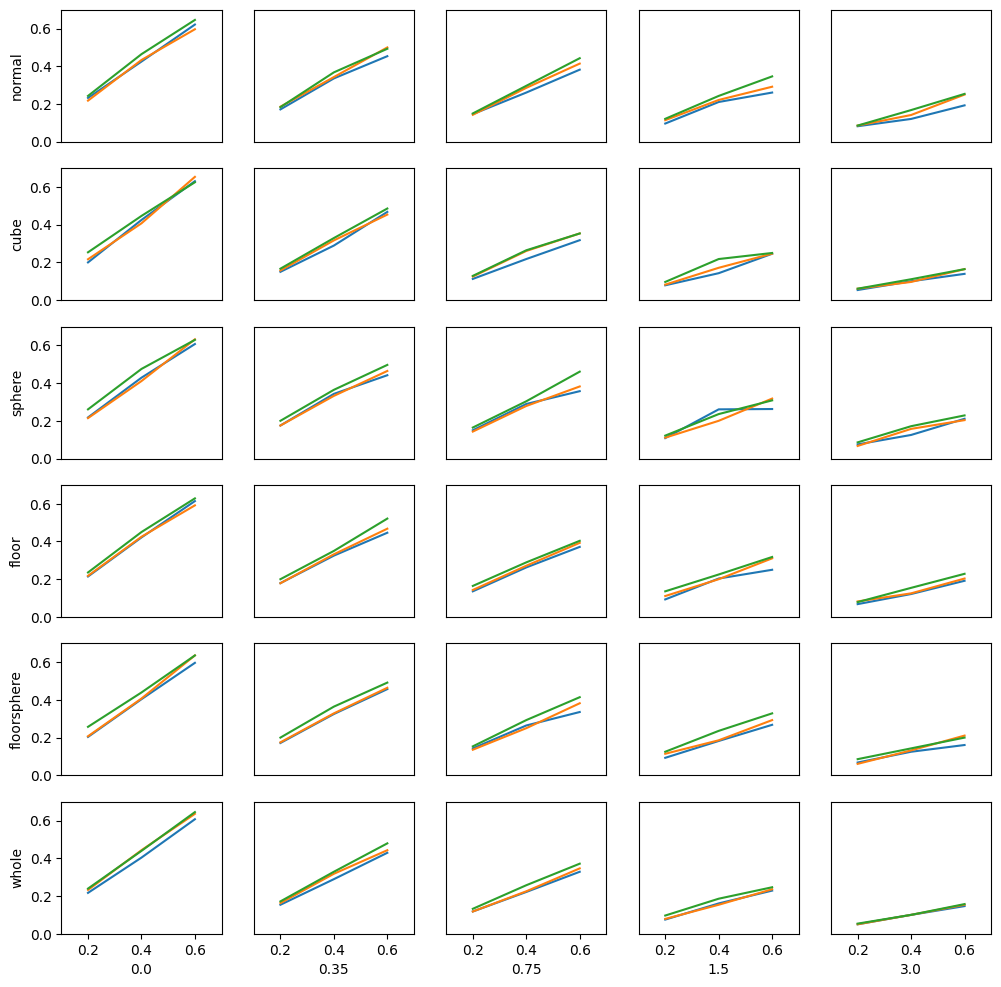

average max difference between channel's judgments is 0.103453
average R channel's judgments is 0.254319
std R channel's judgments is 0.152437
average G channel's judgments is 0.263837
std G channel's judgments is 0.153264
average B channel's judgments is 0.282819
std B channel's judgments is 0.157427


In [12]:
# anova channels
aov = pg.rm_anova(data=df_eevee, dv='error', within='channel', subject='ID', detailed=True)
print(aov)

fig, subs = plt.subplots(len(conditions), len(list_intensities), figsize=(12,12))
for c, cond in enumerate(conditions):
    for i, ill in enumerate(list_intensities):
        subs[c, i].plot(list_labels_ref, np.nanmean(array_responses_eevee, axis =0)[c,:, i])
        subs[c, i].set_xlim(0.1,0.7)
        subs[c, i].set_ylim(0,0.7)
        if i>0:
            subs[c, i].set_yticks([])
        else:
            subs[c, i].set_ylabel(cond)
        if c<(len(conditions)-1):
            subs[c, i].set_xticks([])
        else:
            subs[c, i].set_xlabel(ill)
        
plt.show()
np.nanmean(array_responses_eevee[:,:,:,:, 2] - array_responses_eevee[:,:,:,:, 0])
print("average max difference between channel's judgments is %f"%np.nanmean(np.absolute(array_responses_eevee[:,:,:,:, 2] - array_responses_eevee[:,:,:,:, 0])/array_responses_eevee[:,:,:,:, 2]*2/3))
print("average R channel's judgments is %f"%np.nanmean(array_responses_eevee[:,:,:,:, 0]))
print("std R channel's judgments is %f"%np.nanstd(array_responses_eevee[:,:,:,:, 0]))
print("average G channel's judgments is %f"%np.nanmean(array_responses_eevee[:,:,:,:, 1]))
print("std G channel's judgments is %f"%np.nanstd(array_responses_eevee[:,:,:,:, 1]))
print("average B channel's judgments is %f"%np.nanmean(array_responses_eevee[:,:,:,:, 2]))
print("std B channel's judgments is %f"%np.nanstd(array_responses_eevee[:,:,:,:, 2]))

    Source        SS  DF        MS           F         p-unc       ng2  eps
0  dataset  0.006133   1  0.006133  578.942561  3.385648e-07  0.803893  1.0
1    Error  0.000064   6  0.000011         NaN           NaN       NaN  NaN


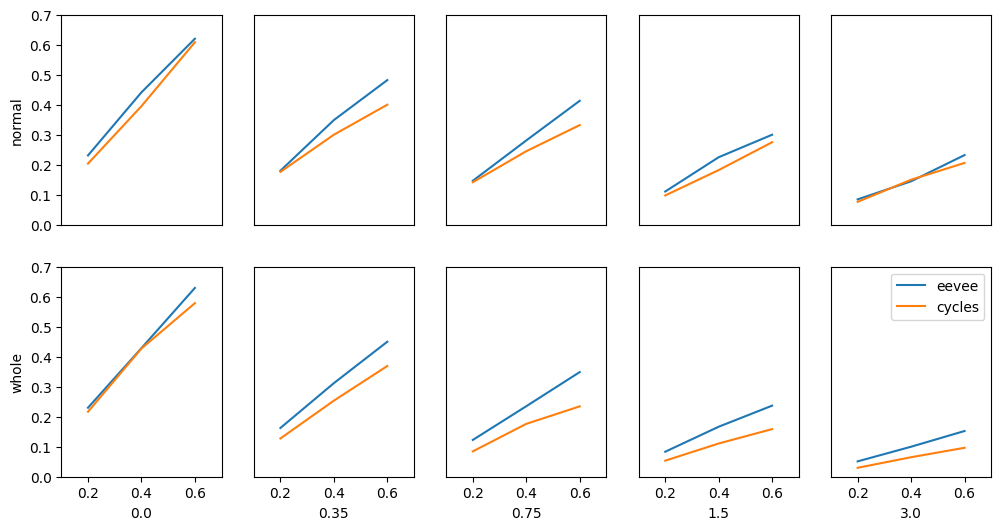

In [13]:
#### Anova on the effect of dataset

aov = pg.rm_anova(data=df, dv='error', within='dataset', subject='ID', detailed=True)
print(aov)
indx_cond = [0, 5] # we consider only a subsection of conditions
fig, subs = plt.subplots(len(['normal', 'whole']), len(list_intensities), figsize=(12,6))
for c, cond in enumerate(['normal', 'whole']):
    for i, ill in enumerate(list_intensities):
        subs[c, i].plot(list_labels_ref, np.nanmean(array_responses_eevee, axis =(0, -1))[indx_cond[c],:, i], label = 'eevee')
        subs[c, i].plot(list_labels_ref, np.nanmean(array_responses_cycles, axis =(0, -1))[indx_cond[c],:, i], label = 'cycles')
        subs[c, i].set_xlim(0.1,0.7)
        subs[c, i].set_ylim(0,0.7)
        if i>0:
            subs[c, i].set_yticks([])
        else:
            subs[c, i].set_ylabel(cond)
        if c<(len(['normal', 'whole'])-1):
            subs[c, i].set_xticks([])
        else:
            subs[c, i].set_xlabel(ill)
plt.legend()
        
plt.show()

In [7]:
df[['resp_time', 'ID']].groupby('ID').mean()
df['resp_time'].mean()

7.177613602745256

In [8]:
dftest = df_eevee[['ID', 'ref', 'illu', 'match','channel','condition']]
dftest.groupby(['ref', 'illu', 'match','channel','condition'])